In [1]:
!pip install selectivesearch

In [1]:
import tensorflow as tf
import os
import numpy as np
import selectivesearch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

(2056, 2124)

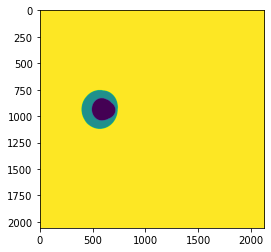

In [2]:
img_dir = 'C:/Users/82107/Desktop/Python/Data/glaucoma/Annotation-Training400/Disc_Cup_Masks/Glaucoma'
img_name = 'g0022.bmp'

image = Image.open(os.path.join(img_dir, img_name))

plt.imshow(image)

image = np.array(image)
image.shape

In [3]:
image = image / 128.

In [4]:
np.unique(image)

image = np.around(image)

In [5]:
image = image.astype(np.int8)

In [6]:
np.unique(image)

array([0, 1, 2], dtype=int8)

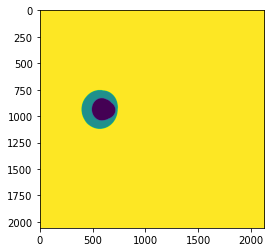

In [7]:
plt.imshow(image)

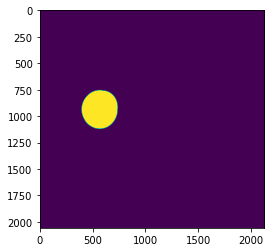

In [9]:
tt_image_1 = (image == 0).astype(np.int8)
tt_image_2 = (image == 1).astype(np.int8)
get_index = tt_image_1 + tt_image_2

plt.imshow(get_index)

In [13]:
get_index = tf.cast(get_index, dtype=tf.float32)

get_index

<tf.Tensor: shape=(2056, 2124), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
np.unique(get_index)

array([0, 1], dtype=int8)

In [11]:
segmented_index = np.where(get_index == 1)

In [12]:
segmented_index

(array([ 756,  756,  756, ..., 1119, 1119, 1119], dtype=int64),
 array([547, 548, 549, ..., 575, 576, 577], dtype=int64))

In [13]:
y, h = np.min(segmented_index[0]), np.max(segmented_index[0])
x, w = np.min(segmented_index[1]), np.max(segmented_index[1])

x, y, w, h

(393, 756, 733, 1119)

# get image

(2056, 2124, 3)

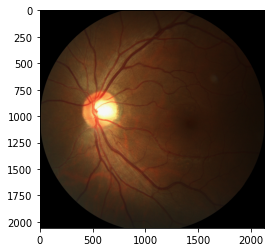

In [14]:
img_dir = 'C:/Users/82107/Desktop/Python/Data/glaucoma/Training400/Glaucoma'
img_name = 'g0022.jpg'

image = Image.open(os.path.join(img_dir, img_name))

plt.imshow(image)

image = np.array(image)
image.shape

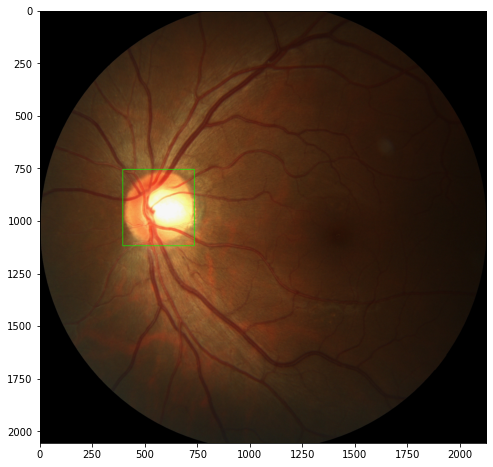

In [15]:
gt_box = [x, y, w, h]

img = cv2.imread(os.path.join(img_dir, img_name))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (0, 255, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

# Detection function

In [16]:
def get_bounding_box(i_dir, i_name):
    # load to mask image
    img_dir, img_name = i_dir, i_name
    image = Image.open(os.path.join(img_dir, img_name))
    image = np.array(image)
    
    # get unique value
    image = image / 128.
    image = np.around(image)
    image = image.astype(np.int8)
    
    # finding x, y, w, h
    tt_image_1 = (image == 0).astype(np.int8)
    tt_image_2 = (image == 1).astype(np.int8)
    get_index = tt_image_1 + tt_image_2
    segmented_index = np.where(get_index == 1)
    y, h = np.min(segmented_index[0]), np.max(segmented_index[0])
    x, w = np.min(segmented_index[1]), np.max(segmented_index[1])
    
    return x, y, w, h

img_dir = 'C:/Users/82107/Desktop/Python/Data/glaucoma/Annotation-Training400/Disc_Cup_Masks/Glaucoma'
img_name = 'g0022.bmp'

x, y, w, h = get_bounding_box(img_dir, img_name)
x, y, w, h